In [ ]:
import torch
from torch import nn
torch.__version__

'2.3.1+cu121'

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import zipfile
import requests
from pathlib import Path

data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'

if image_path.is_dir():
  print('This folder already exist')
else:
  image_path.mkdir(parents=True, exist_ok=True)
with open(data_path / 'pizza_steak_sushi.zip', 'wb') as f:
  request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
  print('Downloading...')
  f.write(request.content)
with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip', 'r') as zip_ref:
  print('Unzipping...')
  zip_ref.extractall(image_path)

This folder already exist
Downloading...
Unzipping...


In [ ]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} folders and {len(filenames)} images in {dirpath}')


In [ ]:
walk_through_dir(image_path)

There are 2 folders and 0 images in data/pizza_steak_sushi
There are 3 folders and 0 images in data/pizza_steak_sushi/test
There are 0 folders and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 folders and 19 images in data/pizza_steak_sushi/test/steak
There are 0 folders and 25 images in data/pizza_steak_sushi/test/pizza
There are 3 folders and 0 images in data/pizza_steak_sushi/train
There are 0 folders and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 folders and 75 images in data/pizza_steak_sushi/train/steak
There are 0 folders and 78 images in data/pizza_steak_sushi/train/pizza


In [ ]:
test_dir = image_path / 'test'
train_dir = image_path / 'train'
test_dir, train_dir

(PosixPath('data/pizza_steak_sushi/test'),
 PosixPath('data/pizza_steak_sushi/train'))

In [ ]:
import random
from PIL import Image
image_path_list = list(image_path.glob('*/*/*.jpg'))
image_path_list

[PosixPath('data/pizza_steak_sushi/test/sushi/1434806.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1680893.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2276986.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2394442.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2741434.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/719108.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1600999.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2521706.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3806282.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1172255.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1742201.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/499605.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/684266.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/887831.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/207578.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/175783.jpg'),
 PosixPath('data/pizza_steak_s

data/pizza_steak_sushi/train/pizza/2154394.jpg pizza
PATH:data/pizza_steak_sushi/train/pizza/2154394.jpg, CLASS: pizza, 512 x 512


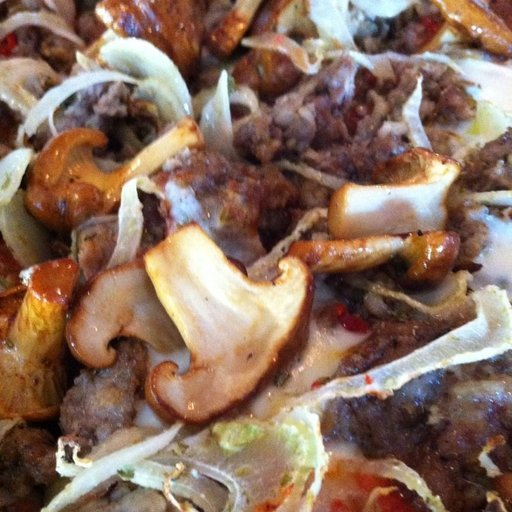

In [ ]:
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
print(random_image_path, image_class)
img = Image.open(random_image_path)
print(f'PATH:{random_image_path}, CLASS: {image_class}, {img.height} x {img.width}')
img

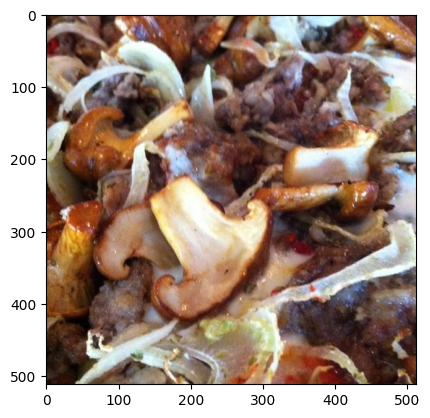

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)
plt.imshow(img_as_array)

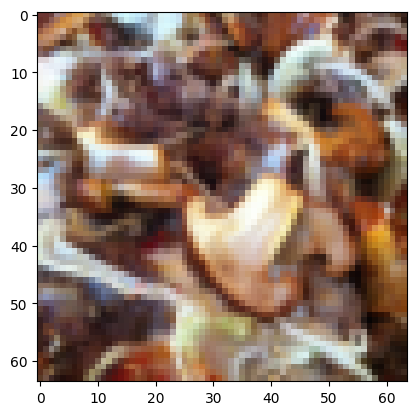

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
data_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
    ])
plt.imshow(data_transforms(img).permute(1, 2, 0))


In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

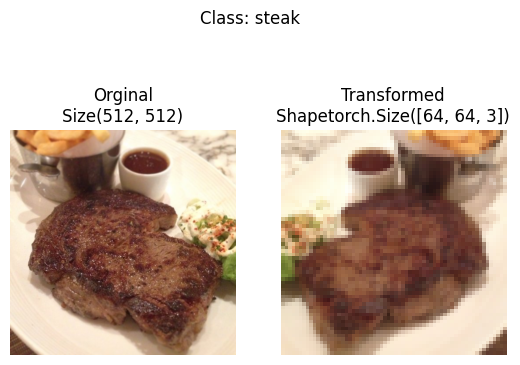

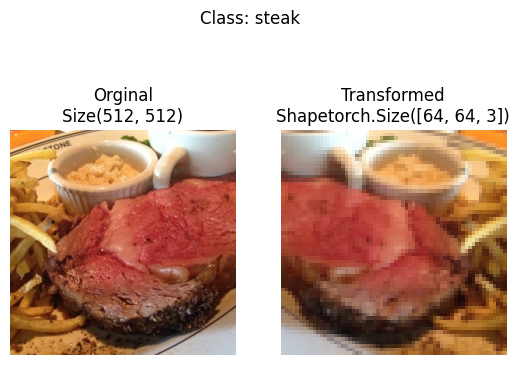

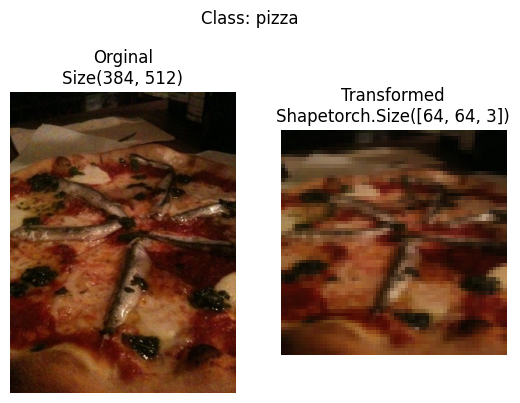

In [ ]:
def plot_transformed_images(images_path, transform, n=3):
  random_image_path = random.sample(images_path, k=n)
  for image_path in random_image_path:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f'Orginal\nSize{f.size}')
      ax[0].axis(False)

      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f'Transformed\nShape{transformed_image.shape}')
      ax[1].axis('off')

      fig.suptitle(f'Class: {image_path.parent.stem}')
plot_transformed_images(image_path_list, data_transforms)

In [ ]:
x = torch.rand([3, 64, 64])
x.permute(1, 2, 0).shape

torch.Size([64, 64, 3])

In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transforms,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transforms,
                                 target_transform=None)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
img , label = train_data[0]
img, label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [ ]:
class_names[label]

'pizza'

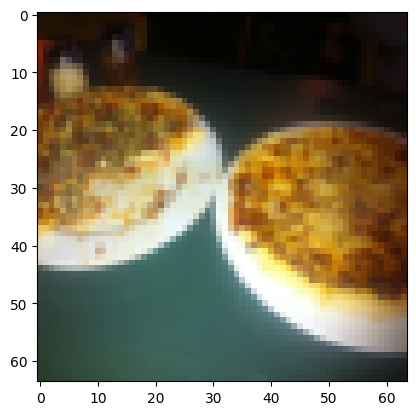

In [ ]:
plt.imshow(img.permute(1, 2, 0))

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=True)

len(train_dataloader), len(test_dataloader)

(225, 75)

In [ ]:
img, label = list(train_dataloader)[0]
img.shape, label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [ ]:
import os
import pathlib
from torch.utils.data import Dataset
from typing import Tuple, Dict, List

In [ ]:
target_dir = train_dir
target_dir

PosixPath('data/pizza_steak_sushi/train')

In [ ]:
class_names_found = sorted([entry.name for entry in list(os.scandir(target_dir))])
class_names_found

['pizza', 'steak', 'sushi']

In [ ]:
def find_classes(dir: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds names of classes in target directory"""
  classes = sorted([entry.name for entry in list(os.scandir(dir))])
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {dir}")
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [ ]:
find_classes(target_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
class ImageFolderV2(Dataset):
  def __init__(self, root: str, transform=None):
    self.paths = list(Path(root).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(root)

  def load_image(self, index: int):
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self):
    return len(self.paths)

  def __getitem__(self, index):
    img = self.load_image(index)
    class_idx = self.class_to_idx[self.paths[index].parent.stem]
    if self.transform:
      return self.transform(img), class_idx
    return img, class_idx

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
train_data_custom = ImageFolderV2(train_dir,
                                  train_transform)
test_data_custom = ImageFolderV2(test_dir,
                                 test_transform)
train_data_custom

In [ ]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

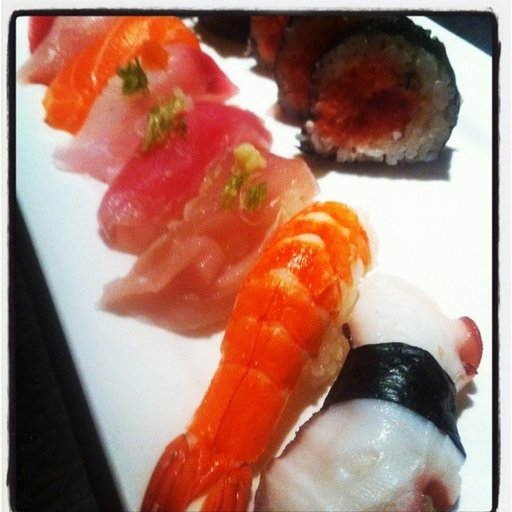

In [ ]:
train_data_custom.load_image(3)

In [ ]:
train_data_custom[5]

(tensor([[[0.0118, 0.0118, 0.0118,  ..., 0.1294, 0.2039, 0.2196],
          [0.0078, 0.0118, 0.0118,  ..., 0.1725, 0.2000, 0.2196],
          [0.0078, 0.0078, 0.0078,  ..., 0.2392, 0.1843, 0.1843],
          ...,
          [0.8941, 0.9176, 0.9373,  ..., 0.8902, 0.8784, 0.8706],
          [0.8902, 0.9098, 0.9255,  ..., 0.8824, 0.8745, 0.8627],
          [0.8824, 0.8941, 0.9098,  ..., 0.8784, 0.8667, 0.8549]],
 
         [[0.0118, 0.0118, 0.0118,  ..., 0.1137, 0.1765, 0.1882],
          [0.0078, 0.0118, 0.0118,  ..., 0.1294, 0.1725, 0.1961],
          [0.0078, 0.0078, 0.0078,  ..., 0.1882, 0.1490, 0.1647],
          ...,
          [0.8627, 0.8824, 0.9059,  ..., 0.8431, 0.8314, 0.8235],
          [0.8510, 0.8667, 0.8863,  ..., 0.8431, 0.8314, 0.8235],
          [0.8510, 0.8588, 0.8706,  ..., 0.8392, 0.8275, 0.8157]],
 
         [[0.0196, 0.0196, 0.0196,  ..., 0.1176, 0.1765, 0.1882],
          [0.0157, 0.0196, 0.0196,  ..., 0.1255, 0.1725, 0.2000],
          [0.0157, 0.0157, 0.0157,  ...,

In [ ]:
def display_random_images(dataset, classes, n=10, display_shape=True):
  if n > 10:
    n = 10
    display_shape = False
  random_sample_idx = random.sample(range(len(dataset)), k=n)
  plt.figure(figsize=(16, 8))
  for i, idx in enumerate(random_sample_idx):
    targ_image, targ_label = dataset[idx]
    plt.subplot(1, n, i + 1)
    plt.imshow(targ_image.permute(1, 2, 0))
    plt.axis(False)
    plt.title(classes[targ_label])


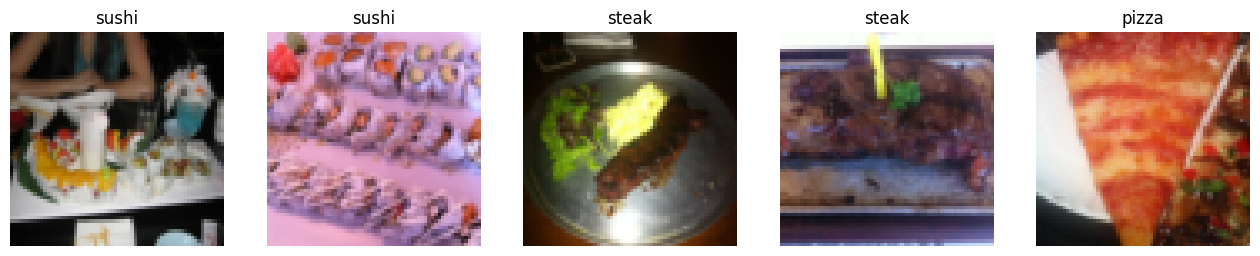

In [ ]:
display_random_images(train_data, class_names, 5)

In [ ]:
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    shuffle=True)
train_dataloader_custom

In [ ]:
img, label = list(train_dataloader_custom)[5]
img.shape, label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [ ]:
class FoodModelV1(nn.Module):
  def __init__(self, input_channels, hidden_unit, output):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_channels,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_unit,
                  out_channels=hidden_unit,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=1690,
                  out_features=output)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x
model_1 = FoodModelV1(3, 10, len(class_names))

In [ ]:
list(train_dataloader_custom)[0][0].shape

torch.Size([1, 3, 64, 64])

In [ ]:
model_1(list(train_dataloader_custom)[0][0])

tensor([[-0.0649,  0.0082,  0.0188]], grad_fn=<AddmmBackward0>)

In [ ]:
simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [ ]:
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

In [ ]:
from torchvision.datasets import ImageFolder

train_data_simple = ImageFolder(root=train_dir,
                                transform=simple_transform)
test_data_simple = ImageFolder(root=test_dir,
                               transform=simple_transform)

In [ ]:
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

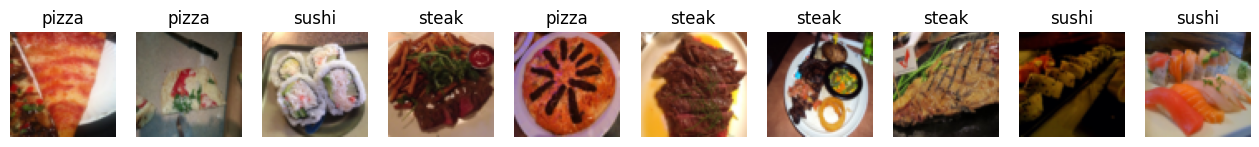

In [ ]:
display_random_images(train_data_simple, class_names)

In [ ]:
model_1(list(train_dataloader_simple)[0][0])

tensor([[-0.0690,  0.0069,  0.0193],
        [-0.0670,  0.0053,  0.0183],
        [-0.0659,  0.0038,  0.0183],
        [-0.0695,  0.0080,  0.0199],
        [-0.0674,  0.0074,  0.0213],
        [-0.0658,  0.0030,  0.0196],
        [-0.0713,  0.0087,  0.0186],
        [-0.0701,  0.0052,  0.0180],
        [-0.0710,  0.0082,  0.0195],
        [-0.0678,  0.0094,  0.0172],
        [-0.0680,  0.0073,  0.0186],
        [-0.0665,  0.0051,  0.0195],
        [-0.0660,  0.0043,  0.0147],
        [-0.0678,  0.0056,  0.0202],
        [-0.0715,  0.0047,  0.0198],
        [-0.0686,  0.0051,  0.0190],
        [-0.0726,  0.0110,  0.0212],
        [-0.0722,  0.0084,  0.0185],
        [-0.0634,  0.0035,  0.0204],
        [-0.0671,  0.0058,  0.0190],
        [-0.0660,  0.0049,  0.0178],
        [-0.0725,  0.0017,  0.0220],
        [-0.0699,  0.0106,  0.0206],
        [-0.0709,  0.0051,  0.0215],
        [-0.0721,  0.0088,  0.0162],
        [-0.0682,  0.0056,  0.0179],
        [-0.0670,  0.0070,  0.0217],
 

In [ ]:
! pip install torchinfo

In [ ]:
from torchinfo import summary
summary(model_1, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
FoodModelV1                              [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [ ]:
def train_step(model, dataloader, loss_fn, optimizer, accuracy_fn):
  train_loss, train_acc = 0, 0
  model.train()
  for batch, (X, y) in enumerate(dataloader):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    acc = accuracy_fn(y, torch.argmax(torch.softmax(y_pred, dim=1), dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
    train_acc += acc.item()
  print("TRAIN")
  print(f"Accuracy: {train_acc / len(dataloader)}%")
  print(f"Loss: {train_loss / len(dataloader)}")

In [ ]:
len(train_dataloader_simple)

8

In [ ]:
def test_step(model, dataloader, loss_fn, accuracy_fn):
  model.eval()
  with torch.inference_mode():
    test_loss, test_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
      y_pred = torch.argmax(torch.softmax(model(X), dim=1), dim=1)
      loss = loss_fn(model(X), y)
      acc = accuracy_fn(y, y_pred)
      test_loss += loss.item()
      test_acc += acc.item()
    print("TEST")
    print(f"Accuracy: {test_acc / len(dataloader)}%")
    print(f"Loss: {test_loss / len(dataloader)}")

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
EPOCHS = 16
for epoch in range(EPOCHS):
  print(f'---------------{epoch + 1}---------------')
  train_step(model_1, train_dataloader_simple, loss_fn, optimizer, accuracy_score)
  test_step(model_1, test_dataloader_simple, loss_fn, accuracy_score)

---------------1---------------
TRAIN
Accuracy: 0.2734375%
Loss: 1.112481489777565
TEST
Accuracy: 0.300189393939394%
Loss: 1.1006337801615398
---------------2---------------
TRAIN
Accuracy: 0.296875%
Loss: 1.1045192778110504
TEST
Accuracy: 0.38257575757575757%
Loss: 1.0946549971898396
---------------3---------------
TRAIN
Accuracy: 0.28125%
Loss: 1.0980092883110046
TEST
Accuracy: 0.3920454545454546%
Loss: 1.08750315507253
---------------4---------------
TRAIN
Accuracy: 0.3203125%
Loss: 1.1109939068555832
TEST
Accuracy: 0.32007575757575757%
Loss: 1.0956369241078694
---------------5---------------
TRAIN
Accuracy: 0.3046875%
Loss: 1.0992923080921173
TEST
Accuracy: 0.37973484848484845%
Loss: 1.095700701077779
---------------6---------------
TRAIN
Accuracy: 0.3046875%
Loss: 1.0966556072235107
TEST
Accuracy: 0.33996212121212127%
Loss: 1.0986391305923462
---------------7---------------
TRAIN
Accuracy: 0.4296875%
Loss: 1.0906212627887726
TEST
Accuracy: 0.32007575757575757%
Loss: 1.108453949292

In [ ]:
from torchvision import transforms
train_transform_aug = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])
images_path = list(image_path.glob('*/*/*.jpg'))

In [ ]:
train_dataset_augmented = ImageFolder(root=train_dir,
                            transform=train_transform_aug)
test_dataset_simple = ImageFolder(root=test_dir,
                            transform=test_transform)
train_dataloader_augmented = DataLoader(train_dataset_augmented, BATCH_SIZE, True)
test_dataloader_simple = DataLoader(test_dataset_simple, BATCH_SIZE, True)

In [ ]:
model_1 = FoodModelV1(input_channels=3,
                      hidden_unit=10,
                      output=len(class_names))
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                            lr=0.001)

In [ ]:
len(train_dataloader_simple)

8

In [ ]:
len(train_dataloader_augmented)

8

In [ ]:
EPOCHS = 10
for epoch in range(EPOCHS):
  print(f'---------------{epoch + 1}---------------')
  train_step(model_1, train_dataloader_augmented, loss_fn, optimizer, accuracy_score)
  test_step(model_1, test_dataloader_simple, loss_fn, accuracy_score)

---------------1---------------
TRAIN
Accuracy: 0.546875%
Loss: 0.9738622531294823
TEST
Accuracy: 0.524621212121212%
Loss: 0.9828198154767355
---------------2---------------
TRAIN
Accuracy: 0.55078125%
Loss: 0.9404108598828316
TEST
Accuracy: 0.5047348484848485%
Loss: 0.986959715684255
---------------3---------------
TRAIN
Accuracy: 0.52734375%
Loss: 0.9207806810736656
TEST
Accuracy: 0.43371212121212127%
Loss: 1.0834419131278992
---------------4---------------
TRAIN
Accuracy: 0.46484375%
Loss: 0.9535337015986443
TEST
Accuracy: 0.43371212121212127%
Loss: 1.0038581490516663
---------------5---------------
TRAIN
Accuracy: 0.56640625%
Loss: 0.9465371072292328
TEST
Accuracy: 0.5350378787878788%
Loss: 0.9522408644358317
---------------6---------------
TRAIN
Accuracy: 0.421875%
Loss: 1.0305385291576385
TEST
Accuracy: 0.4128787878787879%
Loss: 1.075853745142619
---------------7---------------
TRAIN
Accuracy: 0.53125%
Loss: 0.9578656814992428
TEST
Accuracy: 0.40151515151515155%
Loss: 1.011475563

pizza
tensor([[0.3363, 0.3289, 0.3349]], grad_fn=<SoftmaxBackward0>)


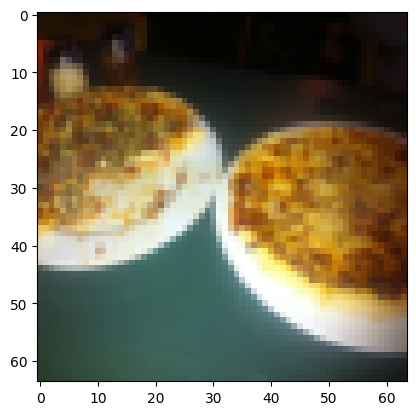

In [ ]:
test_img = test_transform(Image.open('/content/data/pizza_steak_sushi/train/pizza/1008844.jpg'))
print(class_names[model_0(test_img.unsqueeze(dim=0)).argmax(1)])
print(model_0(test_img.unsqueeze(dim=0)).softmax(1))
plt.imshow(test_img.permute(1, 2, 0))